In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('opencv_logo.png')

# OpenCV uses BGR (Blue Green Red) while matplotlib uses RGB (Red Green Blue). Therefore, the channels will be back to front when the OpenCV image is loaded using matplotlib. Therefore, reverse the channel explicitly to maintain original color.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# For GrayScale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



rbc_img = cv2.imread('RBC.png')
# OpenCV uses BGR (Blue Green Red) while matplotlib uses RGB (Red Green Blue). Therefore, the channels will be back to front when the OpenCV image is loaded using matplotlib. Therefore, reverse the channel explicitly to maintain original color.
# rbc_img = cv2.cvtColor(rbc_img, cv2.COLOR_BGR2RGB)

# For GrayScale
rbc_img_gray = cv2.cvtColor(rbc_img, cv2.COLOR_BGR2GRAY)

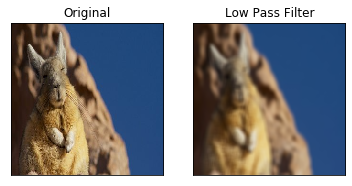

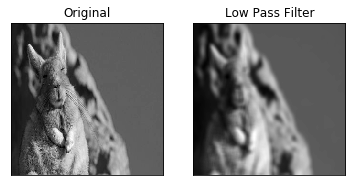

In [2]:
# Low Pass Filter

## Simple mask with 5x5 Array with all values as 1. Outputs somewhat distinguishable image.
# kernel = np.ones((5,5))/25

## Simple mask with 10x10 Array with all values as 1. Outputs very easily distinguishable image.
kernel = np.ones((10,10))/100

## 3x3 Gaussian Filter -> Although the image does get convolved and the output image is much smoother, the blurring/smoothening effects are very weak and the output image retains most of the information from the original image.
# kernel = np.array([[1,2,1],
#                     [2,4,2],
#                     [1,2,1]])/16

# # 5x5 Gaussian Filter -> Although the image does get convolved and the output image is much smoother, the blurring/smoothening effects are very weak and the output image retains most of the information from the original image similar to the 3x3 Gaussian Filter.
# kernel = np.array([[1, 4, 7, 4, 1],
#                    [4, 16, 26, 16, 4],
#                    [7, 26, 41, 26, 7],
#                    [4, 16, 26, 16 ,4],
#                    [1, 4, 7, 4, 1]])/273




# Color
dst = cv2.filter2D(img,-1,kernel) #Discrete Sine Transform (DST) -> converts digital information into equivalent frequency domain by partitioning image pixel matrix into blocks of size N*N. 'img' refers to the original image. '-1' refers to the depth ('precision'/data type of each pixel-> how many bits?) of the output image to be equivalent as the original image. 'kernel' refers to the filter mask.
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Low Pass Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# GrayScale
dst_gray = cv2.filter2D(img_gray,-1,kernel)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('Low Pass Filter')
plt.xticks([]), plt.yticks([])
plt.show()

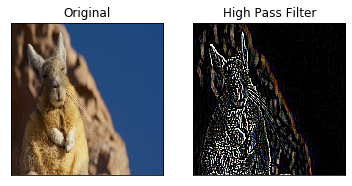

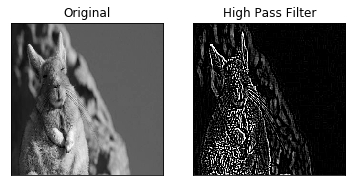

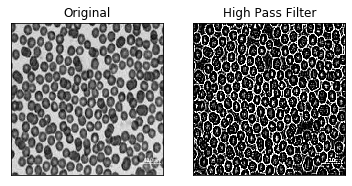

In [3]:
# High Pass Filter


# # Basic 3x3 High-Pass Filter. Output visible, but not ideal.
# kernel = np.array([ [-1,-1,-1],
#                     [-1,9,-1],
#                     [-1,-1,-1]])

## Basic 5x5 High-Pass Filter. Best filter mask to display edges.
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])

## Basic 5x5 High-Pass Filter Output is filtered too much and the image is unobservable.
# kernel = np.array([[0, -1, -1, -1, 0],
#                    [-1, 2, -4, 2, -1],
#                    [-1, -4, 13, -4, -1],
#                    [-1, 2, -4, 2, -1],
#                    [0, -1, -1, -1, 0]])


# Color
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('High Pass Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# GrayScale
dst_gray = cv2.filter2D(img_gray,-1,kernel)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('High Pass Filter')
plt.xticks([]), plt.yticks([])
plt.show()



# GrayScale
rbc_dst_gray = cv2.filter2D(rbc_img_gray,-1,kernel)
plt.subplot(121),plt.imshow(rbc_img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(rbc_dst_gray,cmap="gray"),plt.title('High Pass Filter')
plt.xticks([]), plt.yticks([])
plt.show()

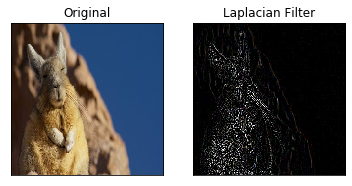

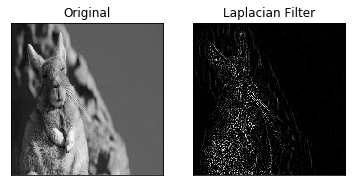

In [4]:
# Laplacian Operator
# Laplacian Operator is a second order derivative mask unlike other mask filters which are first order derivatives. In addition, Laplacian does not filter particular directions. Positive Laplacian Filter is used to take outward edges in an image, and Negative Laplacian Filter is used to take inward edges in an image.
# It is used to enhance discontinuities
# It responds strongly to regions, in which the value of the center region differs from its surrounding. Therefore, it responds strongly to edges but even more to single outlier pixels, making the operator highly sensitive to noise. -> therefore consider Gabor Filters

# 3x3 Negative Laplacian Operator. Output image is visible, but somewhat loses its original form.
# kernel = np.array([ [0,-1,0],
#                     [-1,4,-1],
#                     [0,-1,0]])

# 3x3 Positive Laplacian Operator. Output image is visible, but somewhat loses its original form.
# kernel = np.array([ [0,1,0],
#                     [1,-4,1],
#                     [0,1,0]])

# 3x3 Negative Discrete Laplacian Operator different version. Much more visible compared to the other 3x3 versions above.
# kernel = np.array([ [-1,-1,-1],
#                     [-1,8,-1],
#                     [-1,-1,-1]])

# 3x3 Positive Discrete Laplacian Operator different version. Most visible operator which clearly outlines the edges of the original image.
kernel = np.array([ [1,1,1],
                    [1,-8,1],
                    [1,1,1]])

# 5x5 Positive Laplacian Operator. Output image is plain white -> resulting values exceeded the intensity range.
# kernel = np.array([ [1,1,1,1,1],
#                     [1,1,1,1,1],
#                     [1,1,24,1,1],
#                     [1,1,1,1,1],
#                     [1,1,1,1,1]])

# Color
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Laplacian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# GrayScale
dst_gray = cv2.filter2D(img_gray,-1,kernel)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('Laplacian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

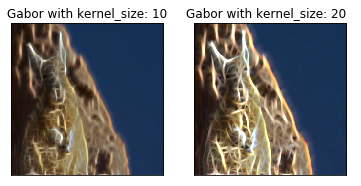

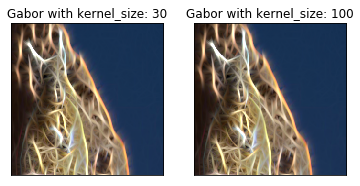

In [31]:
# The OpenCV gaborKernel has the library function: cv2.getGaborKernel(ksize, sigma, theta, lambda, gamma, psi, ktype). ksize referes to the kernel_size, sigma refers to the standard deviation of the Gaussian function used in the Gabor filter. theta refers to the orientation of the normal to the parallel stripes of the Gabor function. lambda refers to the wavelength of the sinusoidal factor. gamma is the spatial aspect ratio. psi is the phase offset. ktype refers to the type and range of values that each pixel in the Gabor kernel can hold.

# kernel_size varies the size of the kernel used for convolution. At smaller values (<10), the effects of the Gabor filters doesn't seem to be very strong, but as the size increases to bigger numbers (between 10~30), the effect becomes maximized and is extremely visible on the output. However, above a certain threshold size (approximately 30), increasing the kernel size did not increase the effects of the Gabor filter on the output image, but still took longer to compute due to the large size of the array. Therefore, depending on the image and the requirements needed, a balance between performance and computational cost should be balanced. In this specific case, kernel_size = 30 seemed to be the most appropriate.

# sigma has been set to 4.0 after trial and error. Different values for sigma had been tested, but at lower values (e.g. 0.0), the output image was entirely black, and at high values (e.g. 100.0), the outut image was too 'bright' with increasingly white regions. The most ideal values lied in a single digit range with 4.0 being optimal for this specific image.

# thetha was varied between the values in the forloop below.

# lambda was set to 10.0 after trial and error. Like sigma, at low values (e.g. 0.0), the output image was entirely black, and at high values (e.g. 1000.0), the image became very blurrly as if a low-pass filter was applied to it. For this specific image,10.0 was the optimal value which output a clear image where the effects of Gabor filters was easily observable.

# gamma was set to 0.5. Similarly, different values of gamma were experimented with. At 0.0, the output was similar with the ideal value of 0.5 for small kernel sizes (<30). However, with increasing kernel_size (e.g. 100), the output image lost it's 'form' and mostly 'lines' resembling the original image was left with a lot of information about the image being lost. At higher values of gamma such as 100.5, the output image increased in contrast with the overall image being brighter and resembling old images from historic cameras with reduced quality.

# ktype was fixed with cv2.CV_64F after referencing the documentation.

def output_Gabor_img(kernel_size):
    Gabor_filters = []
    for theta in np.arange(0, np.pi, np.pi / 16):
        kernel = cv2.getGaborKernel((kernel_size, kernel_size), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_64F)
        kernel /= 1.5*kernel.sum()
        Gabor_filters.append(kernel)
    
    output = np.zeros_like(img)
    for kernel in Gabor_filters:
        filter_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
        np.maximum(output, filter_img, output)

    return output

# plt.imshow(output)
# plt.title('Gabor with kernel_size: '+str(kernel_size))

plt.subplot(121),plt.imshow(output_Gabor_img(10)),plt.title('Gabor with kernel_size: 10')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_Gabor_img(20)),plt.title('Gabor with kernel_size: 20  ')
plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(output_Gabor_img(30)),plt.title('Gabor with kernel_size: 30')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_Gabor_img(100)),plt.title('Gabor with kernel_size: 100')
plt.xticks([]), plt.yticks([])
plt.show()

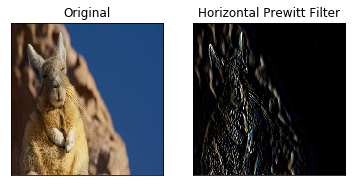

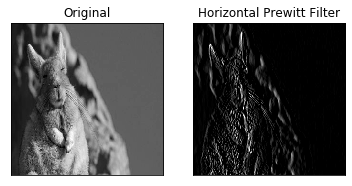

In [5]:
# Horizontal Prewitt Filter (Or Vertical Prewitt Operator)

# Horizontal Prewitt Filter
kernel = np.array([ [-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])

# kernel = np.array([ [1,0,-1],
#                     [1,0,-1],
#                     [1,0,-1]])

# Color
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Horizontal Prewitt Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# GrayScale
dst_gray = cv2.filter2D(img_gray,-1,kernel)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('Horizontal Prewitt Filter')
plt.xticks([]), plt.yticks([])
plt.show()

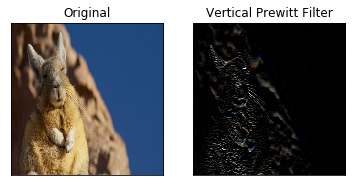

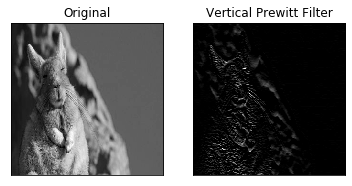

In [6]:
# Vertical Prewitt Filter (Or Horizontal Prewitt Operator)

# Vertical Prewitt Filter
# kernel = np.array([ [-1,-1,-1],
#                     [0,0,0],
#                     [1,1,1]])

kernel = np.array([ [1,1,1],
                    [0,0,0],
                    [-1,-1,-1]])

# Color
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Vertical Prewitt Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# GrayScale
dst_gray = cv2.filter2D(img_gray,-1,kernel)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('Vertical Prewitt Filter')
plt.xticks([]), plt.yticks([])
plt.show()

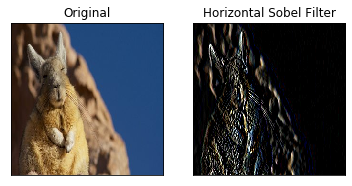

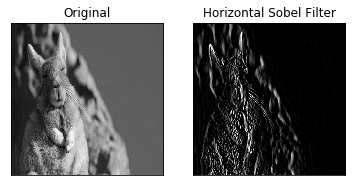

In [7]:
# Horizontal Sobel Filter (Or Vertical Sobel Operator)

# Horizontal Sobel Filter
kernel = np.array([ [-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

# kernel = np.array([ [1,0,-1],
#                     [2,0,-2],
#                     [1,0,-1]])

# Color
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Horizontal Sobel Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# GrayScale
dst_gray = cv2.filter2D(img_gray,-1,kernel)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('Horizontal Sobel Filter')
plt.xticks([]), plt.yticks([])
plt.show()

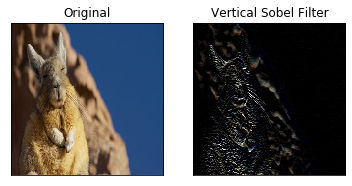

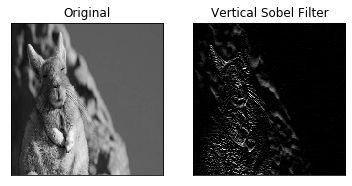

In [8]:
# Vertical Sobel Filter (Or Horizontal Sobel Operator)

# Vertical Sobel Filter
# kernel = np.array([ [-1,-2,-1],
#                     [0,0,0],
#                     [1,2,1]])

kernel = np.array([ [1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])

# Color
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Vertical Sobel Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# GrayScale
dst_gray = cv2.filter2D(img_gray,-1,kernel)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('Vertical Sobel Filter')
plt.xticks([]), plt.yticks([])
plt.show()

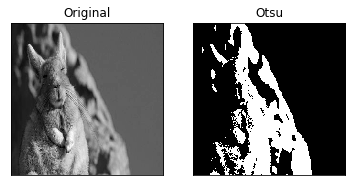

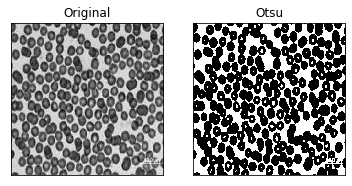

In [9]:
# Thresholding with Otsu's Method

ret,otsu_gray = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(otsu_gray,cmap="gray"),plt.title('Otsu')
plt.xticks([]), plt.yticks([])
plt.show()


# Otsu's Method to apply thresholding to a Red Blood Cell image under a microscope. It clearly distinguishes the 'boundaries' by setting the pixel values to either 1 or 0 based on the set threshold.

ret,rbc_otsu_gray = cv2.threshold(rbc_img_gray, 0, 255, cv2.THRESH_OTSU)
plt.subplot(121),plt.imshow(rbc_img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(rbc_otsu_gray,cmap="gray"),plt.title('Otsu')
plt.xticks([]), plt.yticks([])
plt.show()

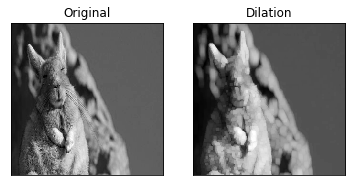

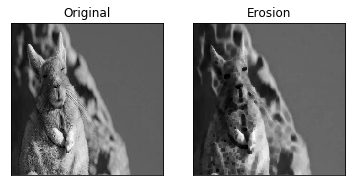

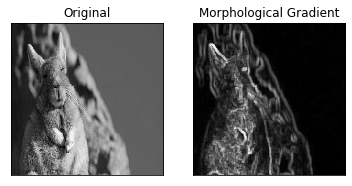

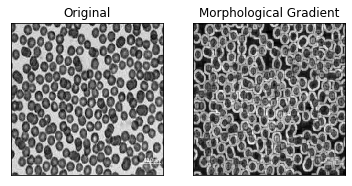

In [10]:
# Simple 5x5 square structuring element resulting in obvious change in the output image. 
kernel = np.ones((5,5))

# Trying Erosion/Dilation using the cross-shaped kernel below resulted in an error, which may be due to the MorphFilter function requiring a specific kernel type such as kernels of np.ones and rejecting other types such as the kernel below. 
# kernel = np.array([ [0,1,0],
#                     [1,1,1],
#                     [0,1,0]])



# Dilation makes a region larger by adding pixels around its edges. A threshold t is set then a zero pixel is set to 1 if the number of differing neighbors exceeds this threshold value. For example, if t = 0, all pixels in the 3 × 3 neighborhood of a region pixel are set to 1.

dilation = cv2.dilate(img_gray,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation,cmap="gray"),plt.title('Dilation')
plt.xticks([]), plt.yticks([])
plt.show()

# Erosion is the counterpart of dilation and makes a region smaller. It uses the identical technique as dilation: if the number of zero neighbors of a region pixel exceeds a threshold t the region pixel is set to zero. For example, if t = 0, all border pixels of a region are eliminated. 

erosion = cv2.erode(img_gray,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion,cmap="gray"),plt.title('Erosion')
plt.xticks([]), plt.yticks([])
plt.show()

# erosion = cv2.erode(dilation,kernel,iterations = 1)
# plt.imshow(erosion,cmap="gray"),plt.title('Erosion')
# plt.xticks([]), plt.yticks([])
# plt.show()

# Morphological Gradient. It is the difference between dilation and erosion of an image. The result will look like the outline of the object.

gradient = cv2.morphologyEx(img_gray, cv2.MORPH_GRADIENT, kernel)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient,cmap="gray"),plt.title('Morphological Gradient')
plt.xticks([]), plt.yticks([])
plt.show()

gradient = cv2.morphologyEx(rbc_img_gray, cv2.MORPH_GRADIENT, kernel)
plt.subplot(121),plt.imshow(rbc_img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient,cmap="gray"),plt.title('Morphological Gradient')
plt.xticks([]), plt.yticks([])
plt.show()

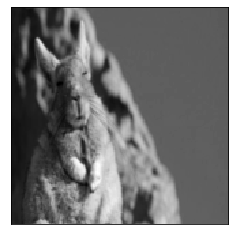

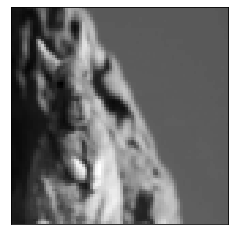

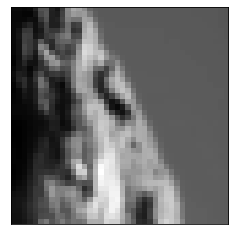

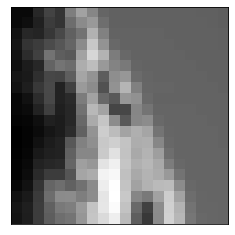

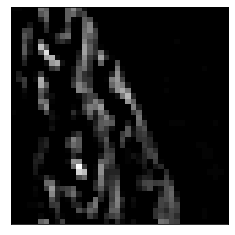

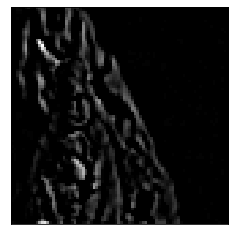

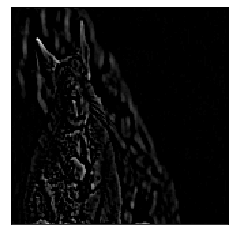

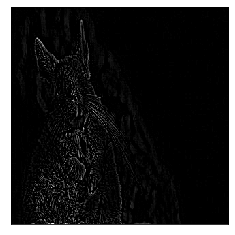

In [11]:
# Generate Gaussian pyramid
G = img_gray.copy()
gpA = [G]
for i in range(4):
    G = cv2.pyrDown(G)
    gpA.append(G)
    plt.imshow(G,cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.show()

# plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(gradient,cmap="gray"),plt.title('Morphological Gradient')
# plt.xticks([]), plt.yticks([])
# plt.show()


# Generate Laplacian Pyramid 
lpA = [gpA[3]]
for i in range(4,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)
    plt.imshow(L,cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.show()

# Output results in 4 Gaussian Pyramids in increasing levels (level 0 to 3, where 3 is the smallest image and shows the most 'pixelated' image). Followed by these 4 Gaussian Pyramid images, a Laplacian Pyramid output is shown in the reverse order (Laplacian Pyramid images for the Gaussian Pyramid images of levels 3 to 0). As expected, smaller images show a more 'blurred' output for the Laplacian Pyramid output.
